# Similarities and Differences between Categories (Pt.1 - Age, Gender, Won/Lost Amount)

In [1]:
# Define libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import os
import plotting_fn as pf
import counting_fns as cf

month_file = '3_July'
cut_off = 10000
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file)


In [2]:
# Read in data
df = pd.read_parquet("top_vs_ntop_players.parquet")

# Round wageredamt and profit to 2 decimal places
df['wageredamt'] = df['wageredamt'].round(1)
df['profit'] = df['profit'].round(1)
df['percent_return'] = df['percent_return'].round(1)


In [3]:
# Create a new column 'result_type' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
df['result_type'] = df['percent_return'].apply(lambda x: 'loss' if x == -100 else 'near-hit' if x < 0 else 'gain' if x > 0 else 'draw')

# Create dummy variables from 'result_type'
dummy_variables = pd.get_dummies(df['result_type']).rename(columns=lambda x: '#' + str(x[0].capitalize()))

# Add the dummy variables to the original DataFrame
df = pd.concat([df, dummy_variables], axis=1).reset_index(drop=True)

# Convert starttime to delte format for operations
df['start_time'] = pd.to_datetime(df['start_time'])

In [4]:
# Create new column called 'time_diff' which is the difference between the start time of the gamble and the start time of the previous gamble
df['time_diff'] = df.groupby(['playerkey', 'session_time'])['start_time'].diff()

# Convert time_diff to seconds
df['time_diff'] = df['time_diff'].dt.total_seconds().fillna(0)

## General Overview

### Players, Visits, Sessions of Each Group

In [5]:
# Number of gamblers
print("Number of gamblers in dataframe:", len(df['playerkey'].unique()))
print('--------------------------------------------------')

# Print number of unique visits
print("Number of unique visits in dtf:", len(df['visit'].unique()))
print('--------------------------------------------------')

# Print number of unique sessions
print("Number of unique sessions in dtf:", len(df['session_time'].unique()))
print('--------------------------------------------------')

Number of gamblers in dataframe: 13619
--------------------------------------------------
Number of unique visits in dtf: 25
--------------------------------------------------
Number of unique sessions in dtf: 9
--------------------------------------------------


### Wins in a row

In [6]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per visit per player
df_s = pf.consecutive_wins(df, 'session_time')

In [7]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per session:')
print(df_s.groupby(['clasification', 'session_time'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')

Categories of wins in a row per session:
                               #2ws    #3ws    #4ws
clasification session_time                         
Ntop          1             30993.0  5991.0  2029.0
              2              5655.0  1112.0   362.0
              3              1398.0   290.0    95.0
              4               295.0    56.0    12.0
              5                80.0    15.0     5.0
              6                23.0    10.0     3.0
              7                 1.0     0.0     0.0
top_10        1             24430.0  4654.0  1414.0
              2             11233.0  2086.0   737.0
              3              4577.0   905.0   294.0
              4              1735.0   331.0   118.0
              5               677.0   101.0    33.0
              6               306.0    30.0    16.0
              7                74.0    24.0     6.0
              8                13.0     2.0     0.0
              9                 5.0     0.0     0.0
-----------------------

In [8]:
# Ude consecutive functions to find 2ws, 3ws, 4ws in a row in each dataset per session_time per player
df = pf.consecutive_wins(df, 'visit')

In [9]:
# Print the numner of total number of 2 wins, 3 wins, 4 wins in a row in each dataset
print('Categories of wins in a row per visit:')
print(df.groupby(['clasification', 'visit'])[['#2ws', '#3ws', '#4ws']].sum())
print('--------------------------------------------------')


Categories of wins in a row per visit:
                        #2ws    #3ws    #4ws
clasification visit                         
Ntop          1      27731.0  5263.0  1777.0
              2       8205.0  1689.0   546.0
              3       1967.0   407.0   131.0
              4        410.0    91.0    35.0
              5        106.0    25.0     7.0
              6         11.0     1.0     0.0
              7         10.0     3.0     1.0
              8          4.0     0.0     0.0
              9          1.0     0.0     0.0
top_10        1      16711.0  3213.0   947.0
              2      14167.0  2653.0   940.0
              3       7011.0  1273.0   390.0
              4       2680.0   511.0   161.0
              5       1044.0   186.0    82.0
              6        388.0    70.0    20.0
              7        216.0    58.0    17.0
              8        189.0    47.0    26.0
              9        135.0    27.0    12.0
              10        73.0    21.0    10.0
              11

### Gender Differences

In [10]:
# Gender differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'gender'])['playerkey'].nunique())
print('--------------------------------------------------')

Number of unique players in dtf:
clasification  gender
Ntop           F         5836
               M         6421
top_10         F          656
               M          706
Name: playerkey, dtype: int64
--------------------------------------------------


### Age Differences

In [11]:
# Create age ranges 
bins = [0, 24, 40, 55, 75, 150]
labels = ['18-24', '25-40', '41-55', '56-75', '76+']
generations = ['Gen Z', 'Millenials', 'Gen X', 'Baby Boomers', 'Silent']

# Use cut function to create age ranges for dtf and top 20%
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df['age_gen'] = pd.cut(df['age'], bins=bins, labels=generations, right=False)

df_s['age_range'] = pd.cut(df_s['age'], bins=bins, labels=labels, right=False)
df_s['age_gen'] = pd.cut(df_s['age'], bins=bins, labels=generations, right=False)

In [12]:
# Age range differences
print("Number of unique players in dtf:")
print(df.groupby(['clasification', 'age_range'])['playerkey'].nunique())
print('--------------------------------------------------')


Number of unique players in dtf:
clasification  age_range
Ntop           18-24         394
               25-40        3952
               41-55        4236
               56-75        3456
               76+           219
top_10         18-24           6
               25-40         244
               41-55         556
               56-75         510
               76+            46
Name: playerkey, dtype: int64
--------------------------------------------------


In [13]:
# Age range differences
print("Number of unique players in dtf:")
print(df_s.groupby(['clasification', 'age_gen'])['playerkey'].nunique())

Number of unique players in dtf:
clasification  age_gen     
Ntop           Gen Z            394
               Millenials      3952
               Gen X           4236
               Baby Boomers    3456
               Silent           219
top_10         Gen Z              6
               Millenials       244
               Gen X            556
               Baby Boomers     510
               Silent            46
Name: playerkey, dtype: int64


Male age differences in dtf:
age_range
18-24     189
25-40    2346
41-55    2579
56-75    1884
76+       129
Name: playerkey, dtype: int64
--------------------------------------------------
Female age differences in dtf:
age_range
18-24     211
25-40    1850
41-55    2213
56-75    2082
76+       136
Name: playerkey, dtype: int64


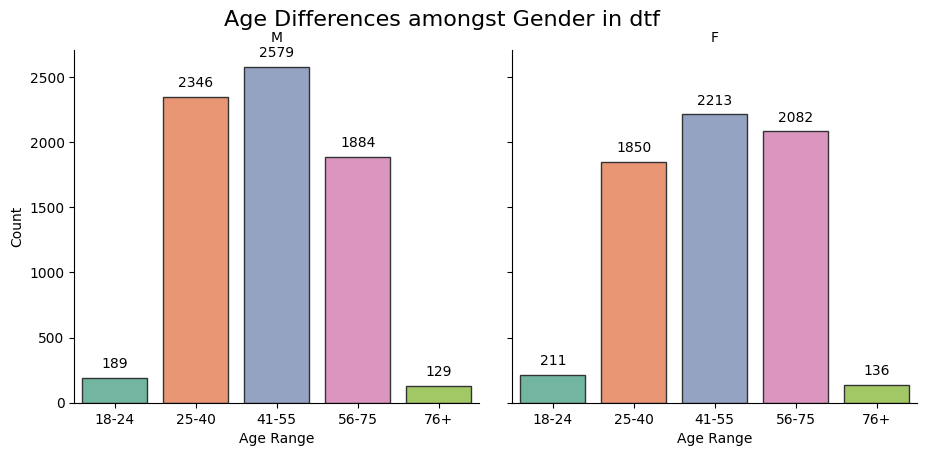

In [14]:
# Age range of male gamblers in dtf
print("Male age differences in dtf:")
print(df[df['gender'] == 'M'].groupby('age_range')['playerkey'].nunique())
print('--------------------------------------------------')
# Age range of Female gamblers in dtf
print('Female age differences in dtf:')
print(df[df['gender'] == 'F'].groupby('age_range')['playerkey'].nunique())

pf.plot_gender_diff(df, 'dtf', figsize=(10, 5))


### Increse and Decrease of SlotDenomination and Bet

In [15]:
# Lets do the same but for bottom 20%
players_increase_slot = cf.count_increase(df, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot = cf.count_decrease(df, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet = cf.count_increase(df, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet = cf.count_decrease(df, "decrease_maxbet", "playerkey", "maxbet")


Count of players who increase_slotdeno : 5246
Count of times each player increase_slotdeno : {4: 2, 14: 3, 36: 1, 79: 3, 90: 1, 156: 5, 159: 2, 180: 3, 203: 2, 223: 2, 239: 2, 245: 1, 248: 1, 260: 3, 273: 1, 274: 7, 278: 1, 324: 1, 371: 3, 373: 1, 410: 4, 429: 1, 430: 2, 433: 1, 443: 1, 447: 2, 461: 1, 464: 1, 486: 1, 506: 1, 509: 1, 518: 1, 533: 1, 534: 1, 541: 2, 542: 1, 546: 3, 547: 7, 553: 1, 554: 2, 574: 2, 581: 1, 592: 1, 599: 3, 600: 1, 608: 1, 611: 1, 612: 3, 615: 5, 616: 1, 620: 2, 624: 1, 630: 13, 635: 2, 636: 1, 641: 3, 643: 1, 645: 2, 646: 2, 655: 3, 656: 4, 658: 6, 660: 1, 661: 7, 662: 2, 667: 1, 669: 1, 677: 9, 684: 2, 690: 1, 698: 4, 699: 1, 703: 1, 705: 1, 707: 2, 711: 1, 715: 3, 724: 2, 725: 2, 736: 3, 739: 1, 740: 1, 743: 1, 746: 9, 747: 2, 748: 1, 749: 1, 751: 2, 754: 1, 758: 1, 759: 1, 769: 3, 773: 3, 777: 5, 779: 2, 780: 2, 782: 3, 783: 1, 784: 1, 787: 1, 789: 1, 799: 2, 809: 1, 810: 1, 814: 1, 824: 2, 825: 1, 836: 1, 839: 1, 842: 1, 843: 1, 845: 2, 864: 1, 870: 3,

In [16]:
# Lets do the same but for df_s
players_increase_slot_s = cf.count_increase(df_s, "increase_slotdeno", "playerkey", "slotdenomination")
players_decrease_slot_s = cf.count_decrease(df_s, "decrease_slotdeno", "playerkey", "slotdenomination")
players_increase_maxbet_s = cf.count_increase(df_s, "increase_maxbet", "playerkey", "maxbet")
players_decrease_maxbet_s = cf.count_decrease(df_s, "decrease_maxbet", "playerkey", "maxbet")

Count of players who increase_slotdeno : 5246
Count of times each player increase_slotdeno : {4: 2, 14: 3, 36: 1, 79: 3, 90: 1, 156: 5, 159: 2, 180: 3, 203: 2, 223: 2, 239: 2, 245: 1, 248: 1, 260: 3, 273: 1, 274: 7, 278: 1, 324: 1, 371: 3, 373: 1, 410: 4, 429: 1, 430: 2, 433: 1, 443: 1, 447: 2, 461: 1, 464: 1, 486: 1, 506: 1, 509: 1, 518: 1, 533: 1, 534: 1, 541: 2, 542: 1, 546: 3, 547: 7, 553: 1, 554: 2, 574: 2, 581: 1, 592: 1, 599: 3, 600: 1, 608: 1, 611: 1, 612: 3, 615: 5, 616: 1, 620: 2, 624: 1, 630: 13, 635: 2, 636: 1, 641: 3, 643: 1, 645: 2, 646: 2, 655: 3, 656: 4, 658: 6, 660: 1, 661: 7, 662: 2, 667: 1, 669: 1, 677: 9, 684: 2, 690: 1, 698: 4, 699: 1, 703: 1, 705: 1, 707: 2, 711: 1, 715: 3, 724: 2, 725: 2, 736: 3, 739: 1, 740: 1, 743: 1, 746: 9, 747: 2, 748: 1, 749: 1, 751: 2, 754: 1, 758: 1, 759: 1, 769: 3, 773: 3, 777: 5, 779: 2, 780: 2, 782: 3, 783: 1, 784: 1, 787: 1, 789: 1, 799: 2, 809: 1, 810: 1, 814: 1, 824: 2, 825: 1, 836: 1, 839: 1, 842: 1, 843: 1, 845: 2, 864: 1, 870: 3,

### Wealth Differences
#### General

In [17]:
# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df['depletion_rate'] = df.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)

# Lets crate a column called 'depletion_slope' which is the difference of 'playercashableamt' between the current gamble and the previous gamble
df_s['depletion_rate'] = df_s.groupby(['playerkey', 'session_time'])['playercashableamt'].diff().fillna(0)


#### Per Visit

In [18]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df[i:i + chunk_size] for i in range(0, df.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_v_chunk = pf.transform_ml(data_b=chunk_df, grouping='visit')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_v_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_v = pd.concat(results)

# Now 'df_ML_v' contains the results from all chunks combined into a single DataFrame

Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [19]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_v['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_v = df_ML_v[df_ML_v.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_v))

# Remove players with NaN values
df_ML_v = df_ML_v[~df_ML_v['playerkey'].isin(list_discrepancy_v)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_v['playerkey'].nunique())

Number of unique players in df_ML_v:  13619
Number of discrepancies: 423
Number of unique players w/o discrepancies:  13196


In [20]:
print(df_ML_v.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'visit', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']


df_ML_v = df_ML_v.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_v.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_vs_ntop_players_ending_balance_by_visit.parquet')

Index(['playerkey', 'visit', 'gender', 'age_range', 'age_gen', 'beginning_amt',
       'ending_amt', 'ending_balance', 'ave_slotdenom', 'std_slotdenom',
       'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '2ws/min

#### Per Session

In [21]:
# Define the chunk size (number of rows in each chunk)
chunk_size = 15000

# Split the original DataFrame df into chunks
df_chunks = [df_s[i:i + chunk_size] for i in range(0, df_s.shape[0], chunk_size)]

# Initialize an empty list to store the results from each chunk
results = []

# Loop through each chunk of the DataFrame
for chunk_df in df_chunks:
    # Process the chunk using the transform_ml function
    df_ML_s_chunk = pf.transform_ml(data_b=chunk_df, grouping='session_time')
    
    # Append the result of this chunk to the results list
    results.append(df_ML_s_chunk)

    # Print chunk number read
    print("Chunk number:", len(results))

# Combine the results from all chunks into a final DataFrame
df_ML_s = pd.concat(results)


Chunk number: 1
Chunk number: 2
Chunk number: 3
Chunk number: 4
Chunk number: 5
Chunk number: 6
Chunk number: 7
Chunk number: 8
Chunk number: 9
Chunk number: 10
Chunk number: 11
Chunk number: 12
Chunk number: 13
Chunk number: 14
Chunk number: 15
Chunk number: 16
Chunk number: 17
Chunk number: 18
Chunk number: 19
Chunk number: 20
Chunk number: 21
Chunk number: 22
Chunk number: 23
Chunk number: 24
Chunk number: 25
Chunk number: 26
Chunk number: 27
Chunk number: 28
Chunk number: 29
Chunk number: 30
Chunk number: 31
Chunk number: 32
Chunk number: 33
Chunk number: 34
Chunk number: 35
Chunk number: 36
Chunk number: 37
Chunk number: 38
Chunk number: 39
Chunk number: 40
Chunk number: 41
Chunk number: 42
Chunk number: 43
Chunk number: 44
Chunk number: 45
Chunk number: 46
Chunk number: 47
Chunk number: 48
Chunk number: 49
Chunk number: 50
Chunk number: 51
Chunk number: 52
Chunk number: 53
Chunk number: 54
Chunk number: 55
Chunk number: 56
Chunk number: 57
Chunk number: 58
Chunk number: 59
Chunk 

In [22]:
# Print number of unique players
print("Number of unique players in df_ML_v: ", df_ML_s['playerkey'].nunique())

# Get the IDs of players who have NaN values in any of the columns
list_discrepancy_s = df_ML_s[df_ML_s.isna().any(axis=1)]['playerkey'].unique()

# print number of discrepancies
print("Number of discrepancies:", len(list_discrepancy_s))

# Remove players with NaN values
df_ML_s = df_ML_s[~df_ML_s['playerkey'].isin(list_discrepancy_s)]

# Print number of unique players with no NaN values
print("Number of unique players w/o discrepancies: ", df_ML_s['playerkey'].nunique())

Number of unique players in df_ML_v:  13619
Number of discrepancies: 418
Number of unique players w/o discrepancies:  13201


In [23]:
print(df_ML_s.columns)

# # # Reorder Columns
desired_order = ['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
                'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
                'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
                'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
                'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope',
                '#inc_maxbet', '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b', 'last_wager',
                'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D', 'w/min', 'l/min', 'nh/min', 'd/min', 
                'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', 
                '3ws_profit','3ws_wgramt', '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
                'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
                'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom', '#dec_slotdenom',
                'unique_machines', 'ave_time_per_machine','classification']

df_ML_s = df_ML_s.reindex(columns=desired_order)

# Save dataframe to paquet file
df_ML_s.to_parquet('/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/'+month_file+'/Ending Balances/Per_Player/top_vs_ntop_player_ending_balance_by_session.parquet')


Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen',
       'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom',
       'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
       'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
       'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit',
       'depletion_slope', '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', 'machines_changes', '#W',
       '#L', '#NH', '#D', 'w/g', 'l/g', 'nh/g', 'd/g', '#2ws', '2ws_profit',
       '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt', '#4ws', '4ws_profit',
       '4ws_wgramt', 'ave_time_per_gamble', 'min_time_per_gamble',
       'max_time_per_gamble', 'total_duration', 'total_gambles',
       'classification', 'unique_machines', 'ave_time_per_machine', 'w/min',
       'l/min', 'nh/min', 'd/min', '